# Lab Exersice 3
*Author: Jakob Heller, Steffen Steiner, Clemens Konrad Müller*

1.a) Write a function xq = my_quant(x,N) that quantises a quasi amplitude-continuous signal x with a value range of $−1 \leq x \leq 1$ with an arbitrary, but odd number N of quantisation steps using the midtread uniform quantiser characteristic curve. Make use of the round function and the quantisation model that was introduced in the course.


In [1]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

def my_quant(x, N):
    L = abs(max(x))+abs(min(x))
    Q = L/N
    # limiter limits the input on x to a certain value so there is no overshoot
    x = np.copy(x)
    idx = np.where(np.abs(x) >= 1)
    x[idx] = np.sign(x[idx])
    # linear uniform quantization
    xQ = Q * np.floor(x/Q + 1/2)
    
    return xQ


b) Test xq = my_quant(x,N) for a signal vector $x = -1:0.001:1$ and generate the left of fig. 1 using N = 17 quantisation steps.

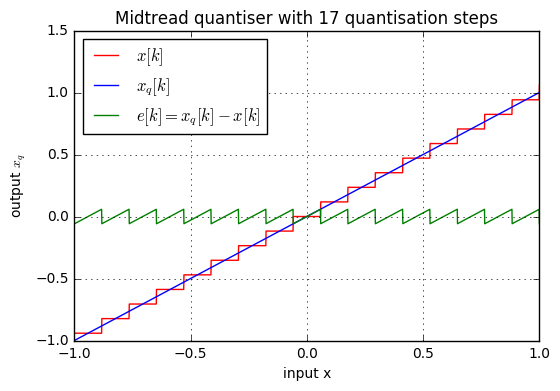

In [2]:
x = np.linspace(-1,1,2/0.001)
x_quant = my_quant(x, 17)
plt.figure
plt.plot(x,x_quant,'r', label='$x[k]$')
plt.plot(x,x, label='$x_q[k]$')
plt.plot(x,x-x_quant, 'g' , label='$e[k]=x_q[k]-x[k]$')
plt.legend(loc='upper left')
plt.title('Midtread quantiser with 17 quantisation steps')
plt.ylabel('output $x_q$')
plt.xlabel('input x')

plt.grid()

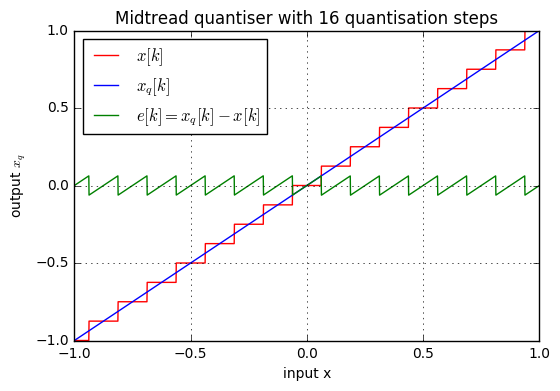

In [3]:
x = np.linspace(-1,1,2/0.001)
x_quant = my_quant(x,16)

plt.figure
plt.plot(x,x_quant,'r', label='$x[k]$')
plt.plot(x,x, label='$x_q[k]$')
plt.plot(x,x-x_quant, 'g' , label='$e[k]=x_q[k]-x[k]$')
plt.legend(loc='upper left')
plt.title('Midtread quantiser with 16 quantisation steps')
plt.ylabel('output $x_q$')
plt.xlabel('input x')
plt.grid()

## Exercise 2: Quantisation of dierent signals, SNR
Solve the following tasks in Matlab or Python. Code examples here follow Matlab syntax and have to be adjusted for Python.
* a) Generate a signal vector xSine that contains a discrete-time, zero-mean sine signal x[k] = A·sin(Ωk) with normalised discrete-time angular frequency Ω = 2πf/fs = 2π/50 and a variance $σ2_x$ = 1/2 (as a time average measure) for 0 ≤ k < 50000. 

In [4]:
omega = (2*np.pi)/50

# Range
N=50000 #int

#maximum amplitude
A=1

#k=kappa the time domain index (array from 0 to Range in N/fs steps)
k = np.arange(N)

#create sines
xSine = A * np.sin(omega*k)     #TODO look sanity check
#plt.plot(k,np.fft.fft(xSine))
#plt.axis([0, 5000, -3, 3]);

b) Generate a signal vector xNorm that contains a discrete-time, zero-mean, normally distributed noise signal (randn()) with a variance $σ2_x$ = 0.0471 for 0 ≤ k < 50000. By doing so the signal amplitudes are mostly within the range −1 ≤ xNorm ≤ 1 and theoretically only 1 sample out of 100,000 samples has a larger amplitude |xNorm| > 1 that would clip the quantiser modeled in exercise 1, cf. [Zöl08, g. 2.5]

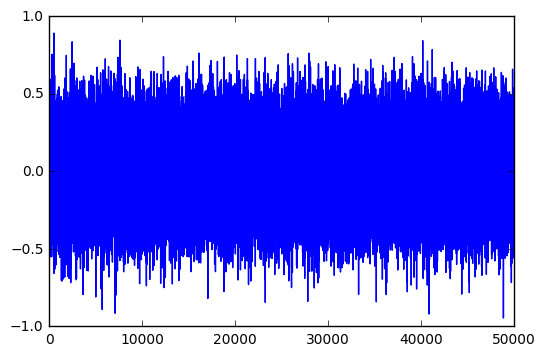

In [5]:
N = 50000
sigma = np.sqrt(0.0471)
xNorm = sigma * np.random.randn(N)
plt.plot(k,xNorm)

c) Generate a signal vector xUniform that contains a discrete-time, zero-mean, uniformly distributed noise signal (rand()) with a variance $σ2_x$ = 1/3 for 0 ≤ k < 50000. By doing so the signal amplitudes are theoretically within the range −1 ≤ xUniform ≤ 1, cf. [Zöl08, p. 23].


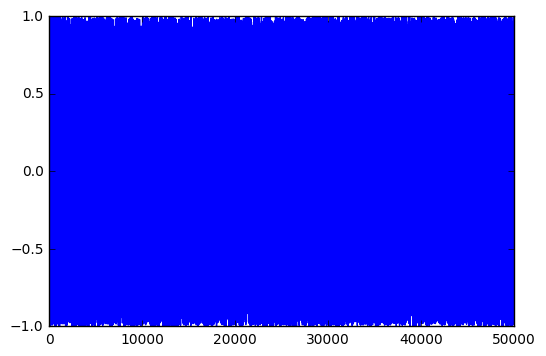

In [6]:
N = 50000
xUniform = np.random.uniform(-1,1,N)
plt.plot(k,xUniform)

d) Generate a signal vector xLaplace that contains a discrete-time, zero-mean, noise signal following the Laplace distribution (laprnd()^1) with a variance $σ2_x$ = 0.0175 for 0 ≤ k < 50000. 

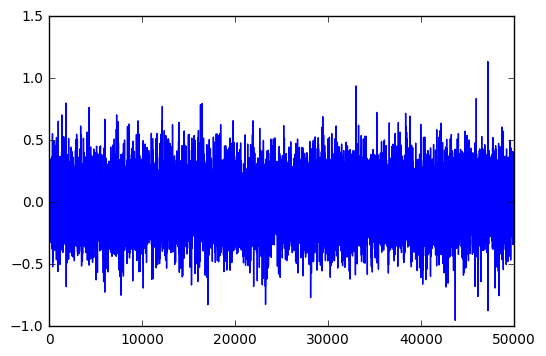

In [7]:
N = 50000
loc = 0
scale = np.sqrt(0.0175/2)
xLaplace = np.random.laplace(loc,scale,N)
plt.plot(k,xLaplace)

e) Generate fig. 2: apply the 4 generated signals to the quantisation with xq = my_quant(x,N)
from exercise 1 for different numbers of bits and calculate the signal-to-noise ratio in dB
as
\begin{equation}
    SNR=10 \cdot log_{10} \frac{\sigma_x²}{\sigma_e²}
\end{equation}

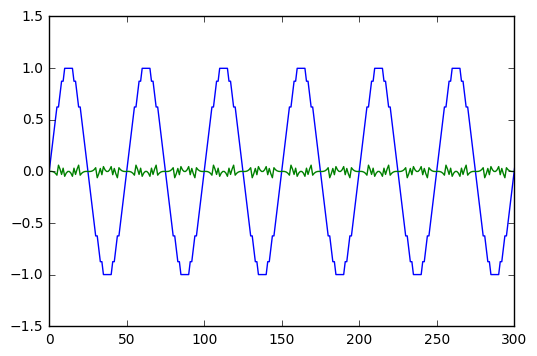

In [21]:
#this is for visualization only
xSine_q=my_quant(xSine, 16)
xSine_e=xSine-xSine_q
plt.plot(k,xSine_q)
plt.plot(k,xSine_e)
plt.axis([0, 300, -1.5, 1.5]); 

In [31]:
#to find the SNR we define a function that computes the SNR depending on the bitwidth
def SNR(f, N): #enter [function, Number of quantisation steps]
    fq=my_quant(f,N) #quantised signal
    fe=np.abs(fq-f) #resulting error
    vf=  np.var(f)#variance of the signal
    ve=  np.var(fe)#variance of the error 
    snr=10* np.log10(vf/ve)#SNR
    return snr 
    #TODO!!!! This function seems to have a problem. The variance of the signal is correct but the SNR is wrong 
    #so either the quantisation or the resulting error estimation are incorrect
    
bitwidth=np.linspace(2,20,19) #bit iteration vector / start=2 as other values seem to be nonsense


#theoratic SNR for the given signals 
SNR_xSine_th=6.02*bitwidth
SNR_xNorm_th=6.02*bitwidth+1.76
SNR_xUniform_th=6.02*bitwidth-8.5
SNR_xLaplace_th=6.02*bitwidth-9

In [32]:
#we sweep through the SNR computation with different bitwidth
def bitwidth_sweep_SNR(f, bitwidth):
    snr=np.zeros(len(bitwidth))
    for i in range(2,len(bitwidth)+2): #iterate i over the array
        snr[(i-2)]=SNR(f,i)
    return snr

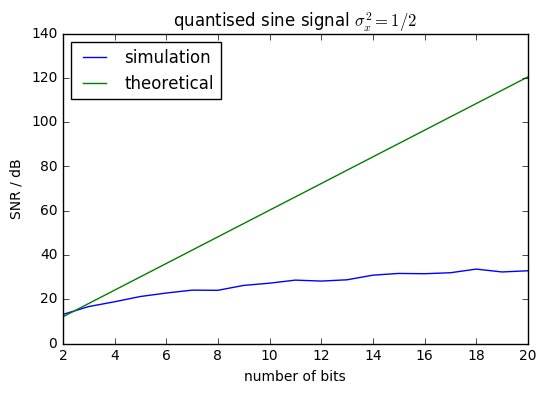

In [33]:
xSine_SNR_sweep=bitwidth_sweep_SNR(xSine, bitwidth)
plt.plot(bitwidth, xSine_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xSine_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised sine signal $\sigma _x^2=1/2$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

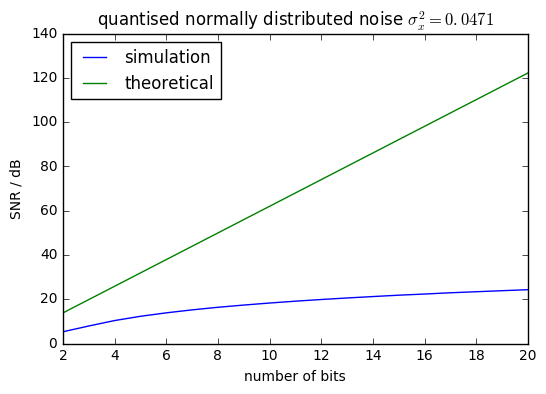

In [34]:
xNorm_SNR_sweep=bitwidth_sweep_SNR(xNorm, bitwidth)
plt.plot(bitwidth, xNorm_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xNorm_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised normally distributed noise $\sigma _x^2=0.0471$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

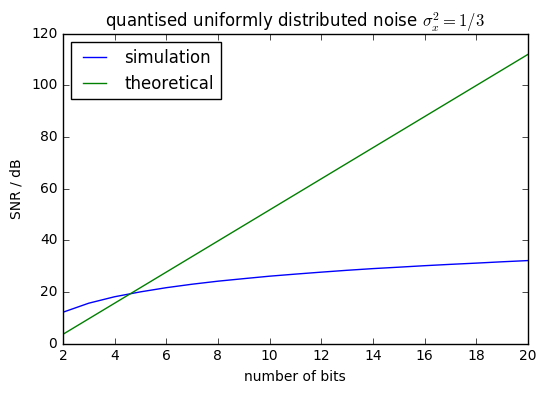

In [35]:
xUniform_SNR_sweep=bitwidth_sweep_SNR(xUniform, bitwidth)
plt.plot(bitwidth, xUniform_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xUniform_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised uniformly distributed noise $\sigma _x^2=1/3$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

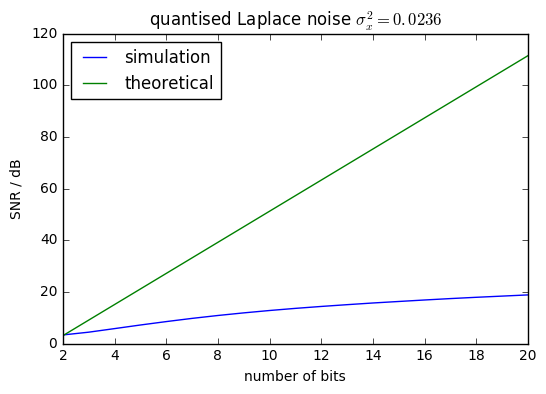

In [36]:
xLaplace_SNR_sweep=bitwidth_sweep_SNR(xLaplace, bitwidth)
plt.plot(bitwidth, xLaplace_SNR_sweep, label='simulation')
plt.plot(bitwidth,SNR_xLaplace_th, label='theoretical')
plt.legend(loc='upper left')
plt.title('quantised Laplace noise $\sigma _x^2=0.0236$')
plt.ylabel('SNR / dB')
plt.xlabel('number of bits')

## Exercise 2: Quantisation of different signals, SNR
* a) Generate the sine signal x[k] defined above.

In [15]:
fsin = 960
fs = 48000
Q = 1/4
x = Q*np.sin(2*np.pi*fsin*k/fs)

b) Generate the dither noise dRECT[k] according to the PDF pRECT(d) = 1/Q*rect(d/Q). Check the resulting amplitude and distribution carefully. The length of dRECT[k] and x[k] must be equal.


In [16]:
dRect = np.random.uniform(-Q/2,Q/2,N)

c) Generate the dither noise dTRI[k] according to the PDF pTRI(d) = 1/Q*tri(d/Q). Check the resulting amplitude and distribution carefully. The length of dTRI[k] and x[k] must be equal.


In [17]:
dTri = np.random.triangular(left=-Q/2,mode=0,right=Q/2,size=N)

d) Add each dither noise dRECT[k] and dTRI[k] individually to x[k]. Together with the original signal without dithering you now have three vectors, e.g. named xNODITH, xRECT and xTRI.


In [18]:
xNodith = x
xRect = x+dRect
xTri = x+dTri

e) Quantise these signals individually with xq = my_quant(x,N) from exercise 1, leading to xqNODITH, xqRECT and xqTRI for N = 2w = 23 = 8 quantisation steps.